## Data Science Project

Notebook by Hridey Narula.
Made for classifying images of people.
100 images of 10 different people.
SVC used.

In [260]:
import numpy as np
import sklearn as sk
import os
import cv2
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as py
import scipy
from sklearn import metrics

from sklearn.svm import SVC # Support Vector Classifier
fs = 26
py.rc('font', size = fs)
py.rc('axes', titlesize = fs)
py.rc('axes', labelsize = fs)
py.rc('legend',fontsize = fs)
py.rc('figure', titlesize = fs)
py.rc('xtick', labelsize = fs)
py.rc('ytick', labelsize = fs)
method = 'linear'
svc_1 = SVC(kernel=method) 

In [261]:
data =[]
path = 'B:\\IPhD at TIFR-H\\Semester 2\\NM1 and DS\\DataScience\\MiniProject1\Faces\Final'
path2= 'B:\\IPhD at TIFR-H\\Semester 2\\NM1 and DS\\DataScience\\MiniProject1\Faces'
picnum=100
fractest=.2
fractrain=1-fractest
sizeX = 40
sizeY = 40

In [262]:
data =[]

for img in os.listdir(path):
    #print(os.path.join(path,img))#
    pic = cv2.imread(os.path.join(path,img))#, cv2.IMREAD_GRAYSCALE)
    #pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    
    pic = cv2.resize(pic,(sizeX, sizeY))
    data.append([pic])
data = np.array(data)

In [263]:
os.getcwd()
y=[]
for k in range(10):
    for j in range(10):
        y.append(k)
y
print(np.shape(data[:, 0]))

(100, 40, 40)


In [264]:
1

1

In [265]:
np.save(os.path.join(path2,'features'),np.array(data))


In [266]:
def print_faces(images, target, top_n):
    fig = py.figure(figsize=(500,500))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(sizeX, sizeY,i+1,xticks=[],yticks=[]) # each image is a 20x20 matrix
        p.imshow(images[i, 0], cmap=py.cm.bone)
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))
    p.figure.savefig("Sample.jpg")

In [267]:
#print_faces(data, y, 20)


In [268]:
saved = np.load(os.path.join(path2,'features.npy'))
#py.imshow(saved)
print(np.ndim(saved))
print(np.ndim(data))
#$saved = saved[0]

4
4


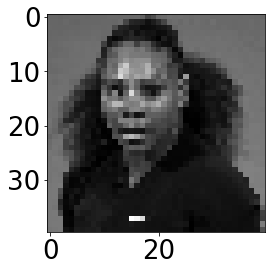

In [269]:
py.imshow(saved[91].reshape(sizeX, sizeY), cmap="gray")


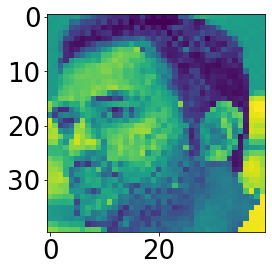

In [270]:
py.imshow(np.array(data[34]).reshape(sizeX, sizeY))

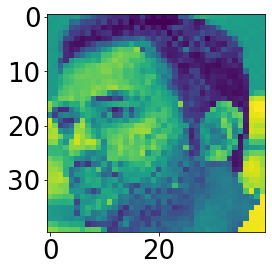

In [271]:
py.imshow(np.array(data[34]).reshape(sizeX, sizeY))


In [272]:
fractest

0.2

In [273]:
X_train, X_test, Y_train, Y_test = train_test_split(saved, y, test_size=fractest, random_state=3)


In [274]:
print(np.shape(X_train))

(80, 1, 40, 40)


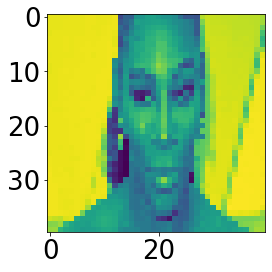

In [275]:
py.imshow(X_test[13].reshape(sizeX, sizeY))

In [276]:
print(Y_train) #Checking

[7, 1, 0, 0, 7, 8, 1, 6, 4, 5, 3, 0, 1, 3, 8, 1, 5, 8, 3, 4, 1, 2, 3, 3, 9, 9, 7, 7, 6, 4, 5, 7, 8, 6, 1, 9, 5, 9, 5, 5, 2, 5, 8, 8, 4, 8, 3, 4, 3, 4, 0, 6, 9, 2, 6, 5, 0, 6, 6, 0, 6, 2, 8, 2, 1, 3, 4, 2, 3, 9, 1, 4, 7, 1, 2, 0, 7, 5, 0, 2]


In [277]:
print(Y_test)

[9, 6, 0, 6, 9, 8, 9, 4, 2, 1, 7, 0, 7, 9, 3, 7, 8, 2, 5, 4]


In [278]:

svc_1.fit(X_train.reshape(int(fractrain*picnum), sizeX*sizeY), Y_train) #Sample RRun


SVC(kernel='linear')

In [279]:
len(X_train)

80

In [280]:
list_ratio = np.round(np.linspace(0.01, 0.9, 21), 2)
#list_ratio = [.1 , .3, .5, .7, .8]
picnum = 100
states = [i for i in range(10)]
print(list_ratio)
TrainScoreMaster = []
TestScoreMaster=[]
for k in list_ratio:
    picn = k*100
    print('--')
    print("Test ratio is " + str(k))
    
    fractest = k
    fractrain = 1-k
    trainsmall =[]
    testsmall =[]
    for s in states:
        X_train, X_test, Y_train, Y_test = train_test_split(saved, y, test_size=fractest, random_state=s)
        trainpic = np.shape(X_train)[0]
        testpic = np.shape(X_test)[0]
        svc_1.fit(X_train.reshape(trainpic, sizeX*sizeY), Y_train)
        train_score=svc_1.score(X_train.reshape(trainpic, sizeX*sizeY), Y_train)
        test_score=svc_1.score(X_test.reshape(testpic, sizeX*sizeY), Y_test)
        trainsmall.append(train_score)
        testsmall.append(test_score)
    meantrain = np.mean(trainsmall)
    meantest =  np.mean(testsmall)
    #print('Avg Score for training set', meantrain)
    #print('Avg Score for test set', meantest)
    TrainScoreMaster.append(meantrain)
    TestScoreMaster.append(meantest)

[0.01 0.05 0.1  0.14 0.19 0.23 0.28 0.32 0.37 0.41 0.45 0.5  0.54 0.59
 0.63 0.68 0.72 0.77 0.81 0.86 0.9 ]
--
Test ratio is 0.01
--
Test ratio is 0.05
--
Test ratio is 0.1
--
Test ratio is 0.14
--
Test ratio is 0.19
--
Test ratio is 0.23
--
Test ratio is 0.28
--
Test ratio is 0.32
--
Test ratio is 0.37
--
Test ratio is 0.41
--
Test ratio is 0.45
--
Test ratio is 0.5
--
Test ratio is 0.54
--
Test ratio is 0.59
--
Test ratio is 0.63
--
Test ratio is 0.68
--
Test ratio is 0.72
--
Test ratio is 0.77
--
Test ratio is 0.81
--
Test ratio is 0.86
--
Test ratio is 0.9


In [281]:
y_pred_test=svc_1.predict(X_test.reshape(int(fractest*picnum), sizeX*sizeY))
print(metrics.classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.20      0.11      0.14         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.08      0.67      0.14         6
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.05      0.12      0.07         8

    accuracy                           0.07        90
   macro avg       0.03      0.09      0.03        90
weighted avg       0.03      0.07      0.03        90



c:\users\hridey\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hridey\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hridey\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

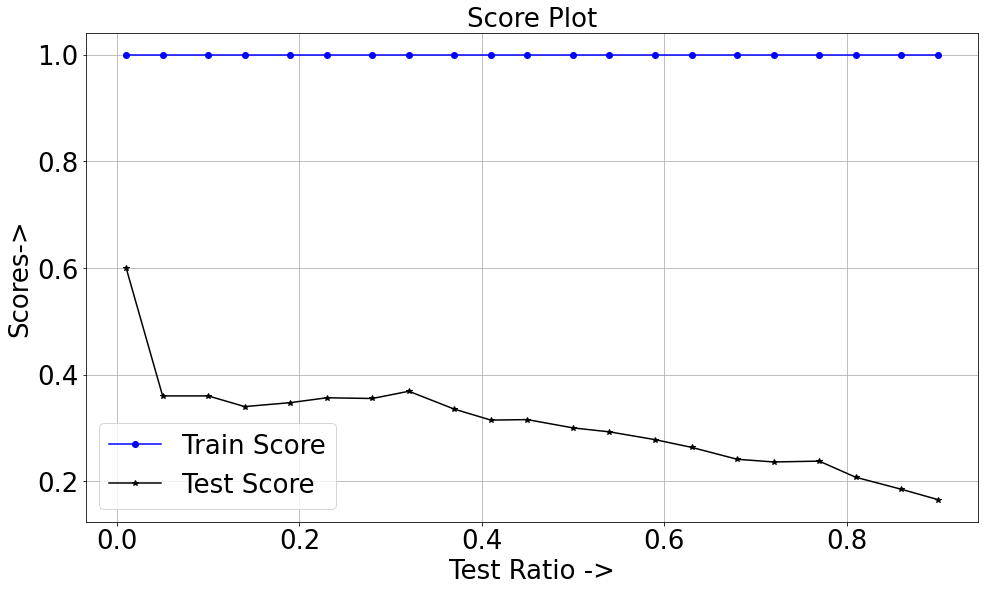

In [282]:
py.plot(list_ratio, TrainScoreMaster, 'b-o', label = "Train Score")
py.plot(list_ratio, TestScoreMaster, 'k-*', label = "Test Score")
py.grid()
py.xlabel("Test Ratio ->")
py.ylabel("Scores->")
fig = py.gcf()
py.title("Score Plot")
py.legend()
fig.set_size_inches(16,9)
py.autoscale()
py.savefig("DSPlotName" + str(sizeX) + method + ".jpg",bbox_inches="tight", dpi=400)
py.show()

## Gender Determination

In [283]:
#svc_1 = SVC(kernel='linear')
y = np.zeros(100)
y[40:50] = 1
y[50:60] = 1
y[70:80] = 1
y[80:90] = 1
y[90:100] = 1

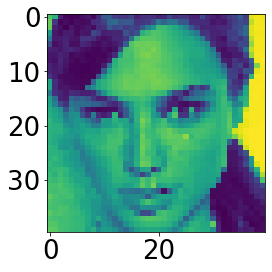

In [284]:
py.imshow(saved[48].reshape(sizeX, sizeY))

In [285]:
list_ratio = np.round(np.linspace(0.01, 0.9, 21), 2)
#list_ratio = [.1 , .3, .5, .7, .8]
picnum = 100
states = [i for i in range(10)]
print(list_ratio)
TrainScoreMaster = []
TestScoreMaster=[]
for k in list_ratio:
    picn = k*100
    print('--')
    print("Test ratio is " + str(k))
    
    fractest = k
    fractrain = 1-k
    trainsmall =[]
    testsmall =[]
    for s in states:
        X_train, X_test, Y_train, Y_test = train_test_split(saved, y, test_size=fractest, random_state=s)
        trainpic = np.shape(X_train)[0]
        testpic = np.shape(X_test)[0]
        svc_1.fit(X_train.reshape(trainpic, sizeX*sizeY), Y_train)
        train_score=svc_1.score(X_train.reshape(trainpic, sizeX*sizeY), Y_train)
        test_score=svc_1.score(X_test.reshape(testpic, sizeX*sizeY), Y_test)
        trainsmall.append(train_score)
        testsmall.append(test_score)
    meantrain = np.mean(trainsmall)
    meantest =  np.mean(testsmall)
    #print('Avg Score for training set', meantrain)
    #p#rint('Avg Score for test set', meantest)
    TrainScoreMaster.append(meantrain)
    TestScoreMaster.append(meantest)

[0.01 0.05 0.1  0.14 0.19 0.23 0.28 0.32 0.37 0.41 0.45 0.5  0.54 0.59
 0.63 0.68 0.72 0.77 0.81 0.86 0.9 ]
--
Test ratio is 0.01
--
Test ratio is 0.05
--
Test ratio is 0.1
--
Test ratio is 0.14
--
Test ratio is 0.19
--
Test ratio is 0.23
--
Test ratio is 0.28
--
Test ratio is 0.32
--
Test ratio is 0.37
--
Test ratio is 0.41
--
Test ratio is 0.45
--
Test ratio is 0.5
--
Test ratio is 0.54
--
Test ratio is 0.59
--
Test ratio is 0.63
--
Test ratio is 0.68
--
Test ratio is 0.72
--
Test ratio is 0.77
--
Test ratio is 0.81
--
Test ratio is 0.86
--
Test ratio is 0.9


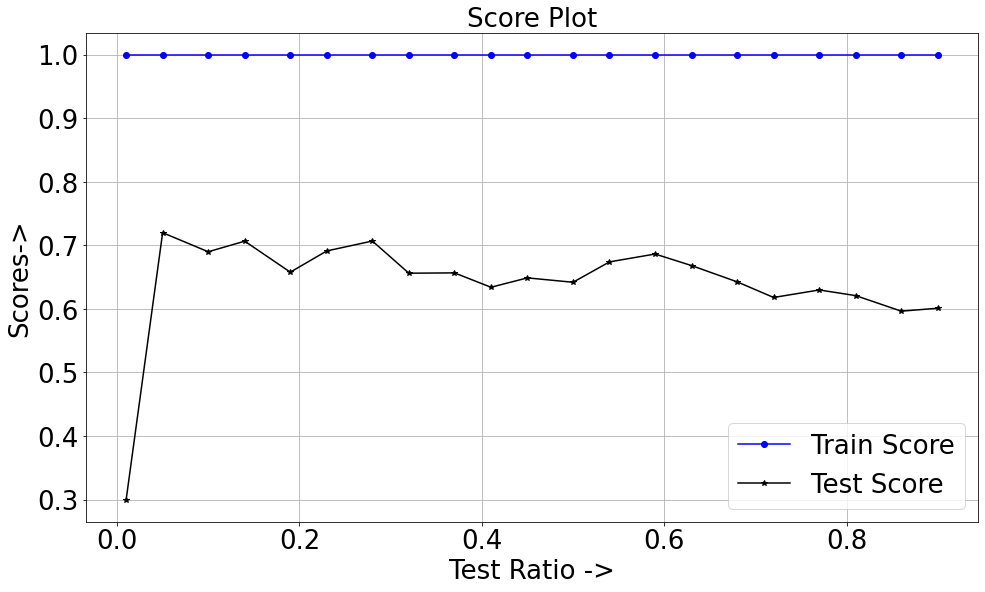

In [286]:
py.plot(list_ratio, TrainScoreMaster, 'b-o', label = "Train Score")
py.plot(list_ratio, TestScoreMaster, 'k-*', label = "Test Score")
py.grid()
py.xlabel("Test Ratio ->")
py.ylabel("Scores->")
fig = py.gcf()
py.title("Score Plot")
py.legend()
fig.set_size_inches(16,9)
py.autoscale()
py.savefig("DSPlotGender" + str(sizeX) + method + ".jpg",bbox_inches="tight", dpi=400)
py.show()

## Accessories

In [287]:
#0 for none
#1 for glasses
#2 for caps
#svc_1 = SVC(kernel='linear')

In [288]:
y = np.zeros(100)
y[0:10] = 1
y[28] = 1
y[30] = 2
y[31]=2
y[35]=2
y[39]=2


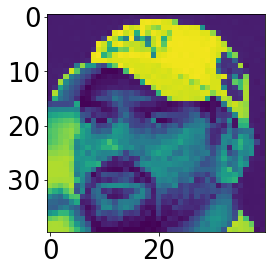

In [289]:
py.imshow(saved[39].reshape(sizeX, sizeY))

In [290]:
list_ratio = np.round(np.linspace(0.01, 0.8, 36), 2)
#list_ratio = [.1 , .3, .5, .7, .8]
picnum = 100
states = [i for i in range(10)]
print(list_ratio)
TrainScoreMaster = []
TestScoreMaster=[]
for k in list_ratio:
    picn = k*100
    print('--')
    print("Test ratio is " + str(k))
    
    fractest = k
    fractrain = 1-k
    trainsmall =[]
    testsmall =[]
    for s in states:
        X_train, X_test, Y_train, Y_test = train_test_split(saved, y, test_size=fractest, random_state=s)
        trainpic = np.shape(X_train)[0]
        testpic = np.shape(X_test)[0]
        svc_1.fit(X_train.reshape(trainpic, sizeX*sizeY), Y_train)
        train_score=svc_1.score(X_train.reshape(trainpic, sizeX*sizeY), Y_train)
        test_score=svc_1.score(X_test.reshape(testpic, sizeX*sizeY), Y_test)
        trainsmall.append(train_score)
        testsmall.append(test_score)
    meantrain = np.mean(trainsmall)
    meantest =  np.mean(testsmall)
    #print('Avg Score for training set', meantrain)
    #print('Avg Score for test set', meantest)
    TrainScoreMaster.append(meantrain)
    TestScoreMaster.append(meantest)

[0.01 0.03 0.06 0.08 0.1  0.12 0.15 0.17 0.19 0.21 0.24 0.26 0.28 0.3
 0.33 0.35 0.37 0.39 0.42 0.44 0.46 0.48 0.51 0.53 0.55 0.57 0.6  0.62
 0.64 0.66 0.69 0.71 0.73 0.75 0.78 0.8 ]
--
Test ratio is 0.01
--
Test ratio is 0.03
--
Test ratio is 0.06
--
Test ratio is 0.08
--
Test ratio is 0.1
--
Test ratio is 0.12
--
Test ratio is 0.15
--
Test ratio is 0.17
--
Test ratio is 0.19
--
Test ratio is 0.21
--
Test ratio is 0.24
--
Test ratio is 0.26
--
Test ratio is 0.28
--
Test ratio is 0.3
--
Test ratio is 0.33
--
Test ratio is 0.35
--
Test ratio is 0.37
--
Test ratio is 0.39
--
Test ratio is 0.42
--
Test ratio is 0.44
--
Test ratio is 0.46
--
Test ratio is 0.48
--
Test ratio is 0.51
--
Test ratio is 0.53
--
Test ratio is 0.55
--
Test ratio is 0.57
--
Test ratio is 0.6
--
Test ratio is 0.62
--
Test ratio is 0.64
--
Test ratio is 0.66
--
Test ratio is 0.69
--
Test ratio is 0.71
--
Test ratio is 0.73
--
Test ratio is 0.75
--
Test ratio is 0.78
--
Test ratio is 0.8


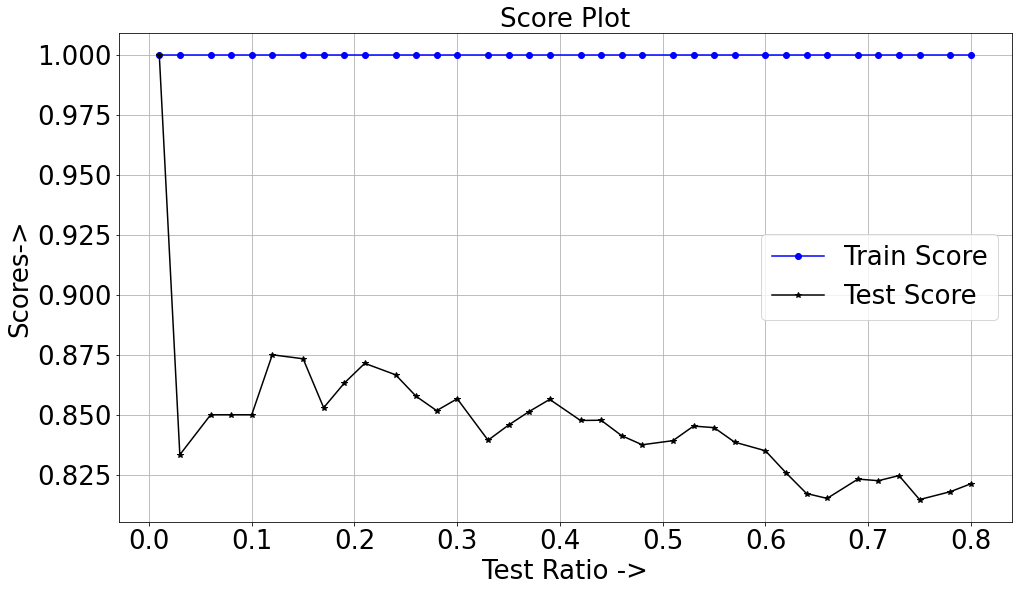

In [291]:
py.plot(list_ratio, TrainScoreMaster, 'b-o', label = "Train Score")
py.plot(list_ratio, TestScoreMaster, 'k-*', label = "Test Score")
py.grid()
py.xlabel("Test Ratio ->")
py.ylabel("Scores->")
fig = py.gcf()
py.title("Score Plot")
py.legend()
fig.set_size_inches(16,9)
py.autoscale()
py.savefig("DSPlotAcc" + str(sizeX) + method + ".jpg",bbox_inches="tight", dpi=400)
py.show()

## Ethinicity

In [292]:
y = np.zeros(100)
#0 Indian
y[10:20] = 1 #black
y[90:100] = 1
y[20:30] = 2 #Asian
y[60:70] = 2#Asian
y[40:50] = 3#White
y[80:90] = 3

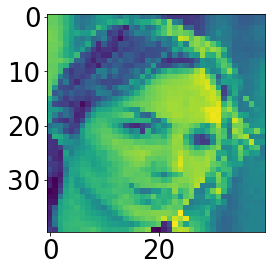

In [293]:
py.imshow(saved[49].reshape(sizeX, sizeY))

In [294]:
list_ratio = np.round(np.linspace(0.01, 0.9, 49), 2)
#list_ratio = [.1 , .3, .5, .7, .8]
picnum = 100
states = [i for i in range(10)]
print(list_ratio)
TrainScoreMaster = []
TestScoreMaster=[]
for k in list_ratio:
    picn = k*100
    print('--')
    print("Test ratio is " + str(k))
    
    fractest = k
    fractrain = 1-k
    trainsmall =[]
    testsmall =[]
    for s in states:
        X_train, X_test, Y_train, Y_test = train_test_split(saved, y, test_size=fractest, random_state=s)
        trainpic = np.shape(X_train)[0]
        testpic = np.shape(X_test)[0]
        svc_1.fit(X_train.reshape(trainpic, sizeX*sizeY), Y_train)
        train_score=svc_1.score(X_train.reshape(trainpic, sizeX*sizeY), Y_train)
        test_score=svc_1.score(X_test.reshape(testpic, sizeX*sizeY), Y_test)
        trainsmall.append(train_score)
        testsmall.append(test_score)
    meantrain = np.mean(trainsmall)
    meantest =  np.mean(testsmall)
    #print('Avg Score for training set', meantrain)
    #print('Avg Score for test set', meantest)
    TrainScoreMaster.append(meantrain)
    TestScoreMaster.append(meantest)

[0.01 0.03 0.05 0.07 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.21 0.23 0.25
 0.27 0.29 0.31 0.33 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.47 0.49 0.51
 0.53 0.55 0.57 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.71 0.73 0.75 0.77
 0.79 0.81 0.83 0.84 0.86 0.88 0.9 ]
--
Test ratio is 0.01
--
Test ratio is 0.03
--
Test ratio is 0.05
--
Test ratio is 0.07
--
Test ratio is 0.08
--
Test ratio is 0.1
--
Test ratio is 0.12
--
Test ratio is 0.14
--
Test ratio is 0.16
--
Test ratio is 0.18
--
Test ratio is 0.2
--
Test ratio is 0.21
--
Test ratio is 0.23
--
Test ratio is 0.25
--
Test ratio is 0.27
--
Test ratio is 0.29
--
Test ratio is 0.31
--
Test ratio is 0.33
--
Test ratio is 0.34
--
Test ratio is 0.36
--
Test ratio is 0.38
--
Test ratio is 0.4
--
Test ratio is 0.42
--
Test ratio is 0.44
--
Test ratio is 0.46
--
Test ratio is 0.47
--
Test ratio is 0.49
--
Test ratio is 0.51
--
Test ratio is 0.53
--
Test ratio is 0.55
--
Test ratio is 0.57
--
Test ratio is 0.58
--
Test ratio is 0.6
--
Test ratio is 0.62
--
Tes

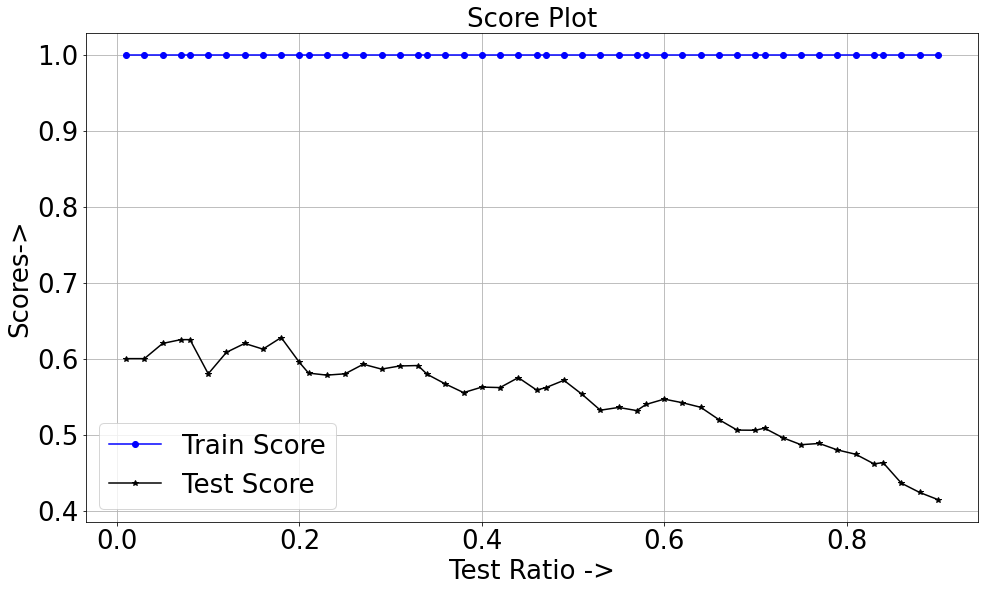

In [295]:
py.plot(list_ratio, TrainScoreMaster, 'b-o', label = "Train Score")
py.plot(list_ratio, TestScoreMaster, 'k-*', label = "Test Score")
py.grid()
py.xlabel("Test Ratio ->")
py.ylabel("Scores->")
fig = py.gcf()
py.title("Score Plot")
py.legend()
fig.set_size_inches(16,9)
py.autoscale()
py.savefig("DSPlotEthinic" + str(sizeX) + method + ".jpg",bbox_inches="tight", dpi=600)
py.show()

### End ###